In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_final = pd.read_csv("files/df_final.csv")

## En este archivo se realizaran las visualizaciones solicitadas en la fase 2

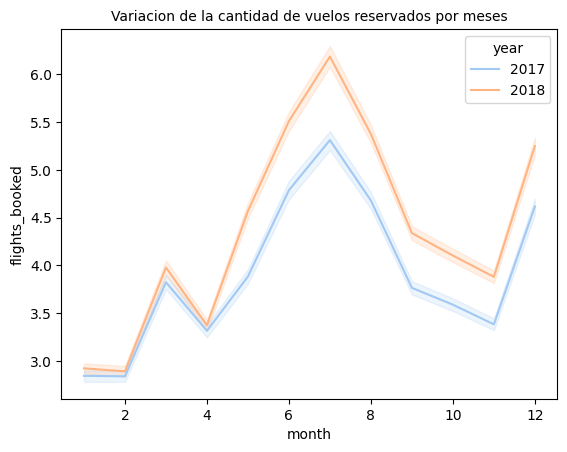

In [4]:

#1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
#    Como vemos en el grafico a partir de abril la cantidad de vuelos reservados comienza a aumentar, 
#    alcanzando su maximo en julio y bajando a partir de aqui, vulven a subir en diciembre (vacaciones de Navidad)
#    Por otra parte vemos que en el año 2018 se reservaron muchos mas vuelos que en 2017, tras ver la cantidad de datos
#    que tenemos de cada año podemos afirmar que los datos no estan sesgados y efectivamente se reservaron mas vuelos, 
#    ya que la diferencia en la cantidad de datos entre los años es minima (284)
sns.lineplot(data = df_final.sort_values(by="month"), x= "month", y= "flights_booked", hue= "year", palette = "pastel")
plt.title("Variacion de la cantidad de vuelos reservados por meses", fontsize = 10);


In [10]:
datos_2017 = df_final[df_final["year"] == 2017]["year"].count()
datos_2018 = df_final[df_final["year"] == 2018]["year"].count()
print(f"Estos son los datos que tenemos del año 2017: {datos_2017}")
print(f"Estos son los datos que tenemos del año 2018: {datos_2018}")

Estos son los datos que tenemos del año 2017: 201738
Estos son los datos que tenemos del año 2018: 202022


In [11]:
datos_2018-datos_2017

284

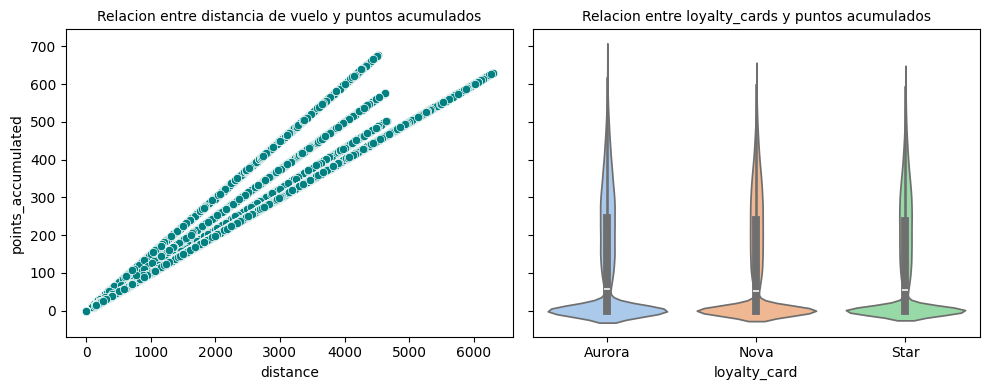

In [14]:

# 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?
#     Observamos una fuerte relacion positiva, a mayor distancia mas puntos acumula; sin embargo en el grafico vemos 4 lineas
#     claras, lo cual indica que hay otra variable que afecta a esta distribucion. Se ha buscado esta variable filtrando el df
#     por 3000 de distancia y viendo en que se basan para darles distinta cantidad de puntos:
#     450 puntos se dan a Loyalty card Aurora
#     375 puntos se dan a Loyalty card Nova
#     324 puntos se dan a Loyalty card Star
#     300 puntos se dan indistintamente

fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True)
sns.scatterplot(x = "distance", y = "points_accumulated", data = df_final, color = "teal", ax = axes[0])
axes[0].set_ylabel("points_accumulated")
axes[0].set_xlabel("distance")
axes[0].set_title("Relacion entre distancia de vuelo y puntos acumulados", fontsize = 10)

sns.violinplot(x = "loyalty_card", y = "points_accumulated", data = df_final, palette= "pastel", ax = axes[1])

axes[1].set_xlabel("loyalty_card")
axes[1].set_ylabel("points_accumulated")
axes[1].set_title("Relacion entre loyalty_cards y puntos acumulados", fontsize = 10)

fig.tight_layout();


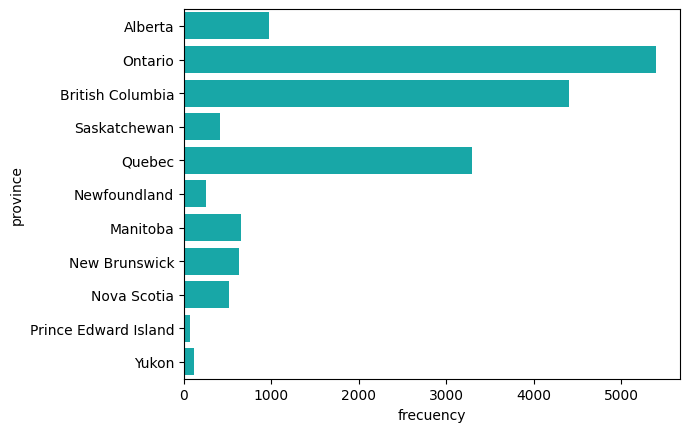

In [ ]:

#3. ¿Cuál es la distribución de los clientes por provincia o estado?
#    Como vemos en el grafico las provincias con mas clientes son Ontario, B.Columbia y Quebec
#    En la siguiente grafica vemos que en estas 3 provincias es donde hay mas clientes con niveles altos de educacion
#    Comprobamos en un tercer grafico si estas provincias son las que tienen mayor nivel de salario, y confirmamos que así es,
#    lo cual encaja con que a mayor salario, mayor nivel educativo

sns.countplot(y = "province", 
              data = df_final.drop_duplicates(subset=["loyalty_number"]), #creo un df sin duplicados de numero cliente
              color = "c")

plt.ylabel("province")
plt.xlabel("frecuency")


''

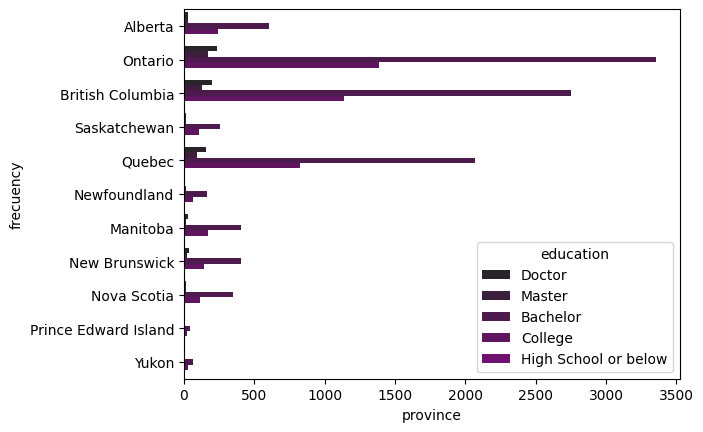

In [36]:
sns.countplot(y = "province", 
              data = df_final.drop_duplicates(subset=["loyalty_number"]), #creo un df sin duplicados de numero cliente
              color = "purple",
              hue = "education",
              hue_order=["Doctor", "Master", "Bachelor", "College", "High School or below"])

plt.xlabel("province")
plt.ylabel("frecuency")
;

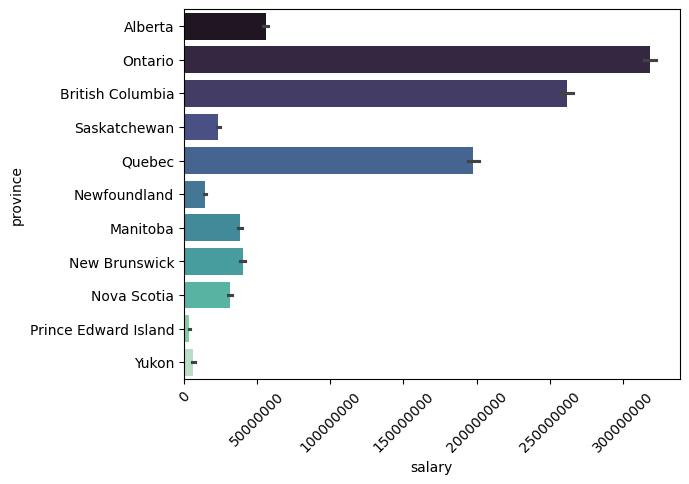

In [42]:
df = df_final.drop_duplicates(subset=["loyalty_number"])[["province", "salary"]]
sns.barplot(y = "province", 
            x = "salary",
              data = df, 
              palette = "mako", estimator = sum)

plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation = 45);

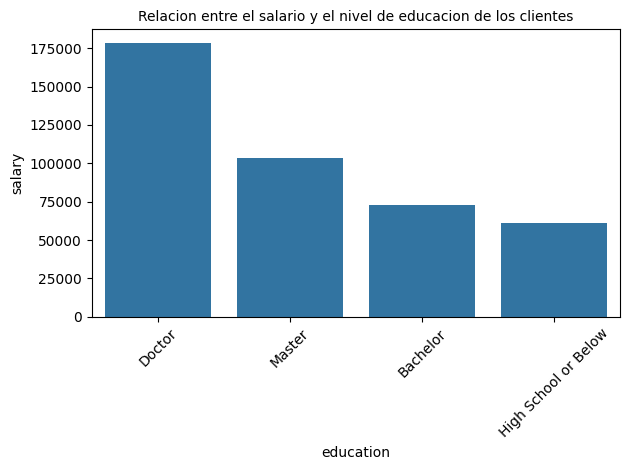

In [ ]:

#4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
#    Eliminamos la columna de College ya que no hay ningun salario registrado para este nivel de estudios
#    Como vemos en el grafico los salarios mas altos corresponden a los niveles de educacion mas altos confirmando
#    nuevamente lo visto en los graficos del punto anterior

df_educacion = df_final.groupby("education")["salary"].mean().reset_index().sort_values(by = "salary", ascending = False)

sns.barplot(y = "salary", x = "education", data = df_educacion[df_educacion["education"] != "College"])

plt.xlabel("education")
plt.ylabel("salary")
plt.title("Relacion entre el salario y el nivel de educacion de los clientes", fontsize = 10)
plt.xticks(rotation = 45)
plt.tight_layout();

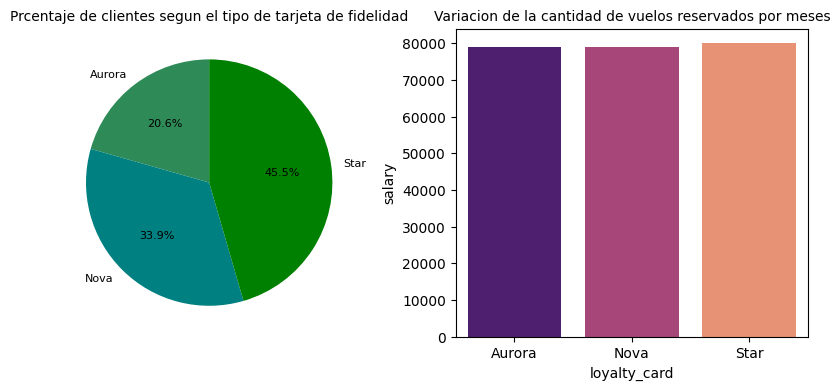

In [ ]:

#5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
#    La mayoria de clientes tienen la tarjeta Star, seguidos por los que tienen Nova, y la menos usada es la Aurora, 
#    que segun el analisis del punto dos es la que mas puntos da.
#    Vamos a comprobar tambien como se relacionan las tarjetas con el salario.
#    Despues de ver el grafico de barras vemos que no hay relacion aparente entre el tipo de tarjeta y el nivel adquisitivo del cliente

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
df_tarjetas = df_final.groupby("loyalty_card")["loyalty_number"].count().reset_index()
colores = ["seagreen", "teal", "green"]

# creamos el gráfico basándonos en el DataFrame que hemos creado en el paso anterior
axes[0].pie("loyalty_number", labels= "loyalty_card",
        data = df_tarjetas.drop_duplicates(subset=["loyalty_number"]), 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 8}, 
        startangle=90)
axes[0].set_title("Prcentaje de clientes segun el tipo de tarjeta de fidelidad", fontsize = 10)


sns.barplot(y = "salary", x="loyalty_card", data = df_final.drop_duplicates(subset=["loyalty_number"]).groupby("loyalty_card")["salary"].mean().reset_index() , palette = "magma", ax= axes[1])
axes[1].set_title("Variacion de la cantidad de vuelos reservados por meses", fontsize = 10);


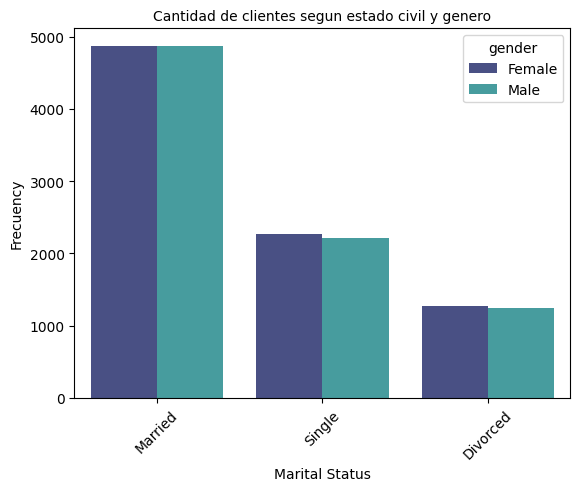

In [ ]:

# 6. ¿Cómo se distribuyen los clientes según su estado civil y género?
#     En cuanto al genero observamos que aunque hay mas mujeres que hombre, la diferencia es minima,
#     En cuanto al estado civil la mayoria de clientes son casados, seguidos de solteros y divorciados

sns.countplot(x = "marital_status", 
              data = df_final.drop_duplicates(subset=["loyalty_number"]), 
              palette = "mako", 
              hue = "gender") 
plt.xticks(rotation = 45)
plt.xlabel("Marital Status")
plt.ylabel("Frecuency")
plt.title("Cantidad de clientes segun estado civil y genero", fontsize = 10); 